Primero voy a comenzar importando las librerías necesarias

In [12]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np

Establezco la cantidad de muestras de la señal con la que voy a trabajar y el vector rango de muestreo

In [13]:
n = 40980
t = np.arange( 0, n, 1 )

Realizo la apertura de las señales mediante el comando rdsamp, el vector 'signal' contiene el valor de la señal para cada numero de muestra y 'fields' contiene distintos parametros de la medición

In [4]:
signal, fields = wfdb.io.rdsamp('101', pb_dir='mitdb', sampto = n )

Realizo el calculo de fft 

In [5]:
resf = fields.get( 'fs' )/n                         #Resolucion
frq = np.arange( 0, 360 , resf)                     #Rango de frecuencias
frq = frq[range( n//2 )]                            #Mitad de Rdf por ser simetrica la fft

Y = np.fft.fft( signal[:,0] )                       #fft 
Ymedi = Y[range( n//2 )]                            #Media fft por ser simetrica
Ymodu = abs( Ymedi )                                #Modulo de la media fft
Ynorm = Ymodu / n                                   #Modulo de la media fft normalizada

A continuación realizo el recorte de la señal para un cierto porcentaje de energía. Para eso comienzo inicializando algunas variables

In [6]:
YR = np.zeros( n//2, complex )
i = 0  
areaY = 0
porcentaje = 0.95

Luego calculo el área bajo la curva de la señal normalizada para obtener la energía de la misma

In [7]:
for i in range( n//2 ):
    areaY = areaY + ( (Ynorm[i])**2 )*resf

Obtencion del espectro (for hasta -1 para tomar el valor de i=0)

In [8]:
areaVariable = areaY
for i in  np.arange( n//2-1, -1, -1 ):
    if areaVariable  > ( porcentaje*areaY ):
        areaVariable  = areaVariable  - ( (Ynorm[i])**2 )*resf
        YR[i] = 0 
        frecCorte = frq[i]
    else:
        YR[i] = Y[i]
        
        
YmoduR = abs( YR )
YnormR = YmoduR / n 

Ahora calculo la señal recortada, utilizando la funcion ifft (tambien calculo la anti transformada de la señal original pero sin espejar así se ve más parecida)

In [15]:
antiYR = np.fft.ifft( YR )
antiY = np.fft.ifft( Ymedi )
tmedi = np.arange( 0, n//2, 1 ) 

Grafico el espectro original y el recortado

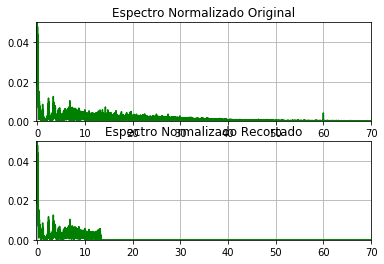

In [9]:
plt.figure( 1 )
plt.subplot( 211 )
plt.plot( frq, Ynorm , 'g' )
plt.title( 'Espectro Normalizado Original' )
plt.grid(True)
plt.xlim( -0.2, 70 )
plt.ylim( 0, 0.05)


plt.subplot ( 212 )
plt.plot( frq, YnormR , 'g' )
plt.title( 'Espectro Normalizado Recortado' )
plt.grid( True )
plt.xlim( -0.2, 70 )
plt.ylim( 0, 0.05 )

plt.show() 

Grafico la señal original (pero la que obtuve mediante la ifft de la media fft) y la señal recortada

C:\Users\Lucia\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-0.5, 800)

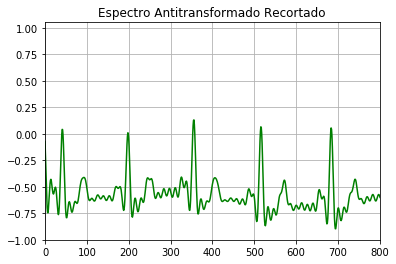

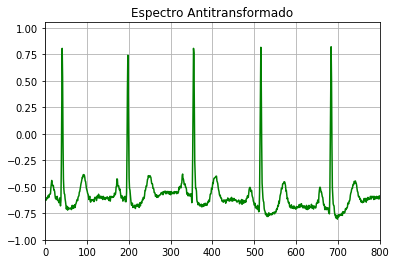

In [14]:
plt.figure(3)
plt.plot( tmedi, antiYR , 'g'  )
plt.title( 'Espectro Antitransformado Recortado' )
plt.grid( True )
plt.ylim( -1, 1.05 )
plt.xlim( -0.5, 800 )

plt.figure(4)
plt.plot( tmedi, antiY , 'g' )
plt.title( 'Espectro Antitransformado' )
plt.grid( True )
plt.ylim( -1, 1.05 )
plt.xlim( -0.5, 800 )    